In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
## Set some pandas options to show the full rows and columns of a DF
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)


In [ ]:
1 - (np.exp(-((x - self.region.metacommunity._hackersonly["filtering_optimum"]) ** 2)\
                                /es))

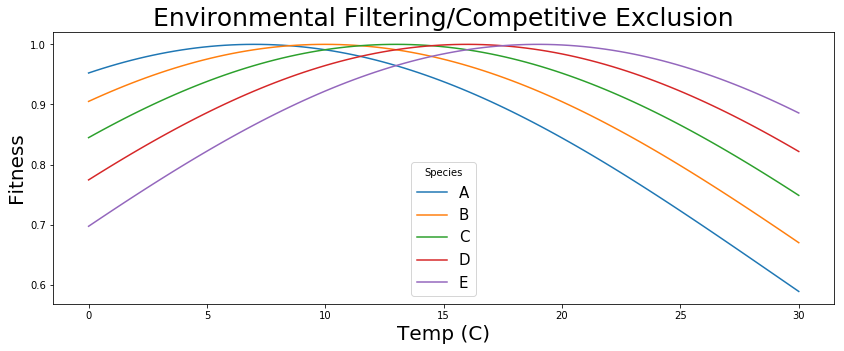

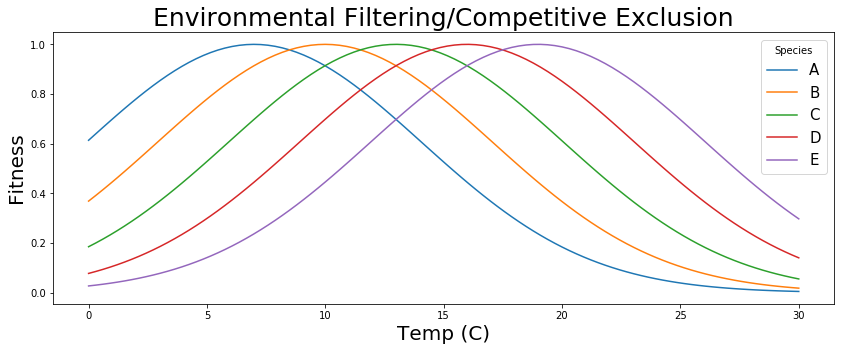

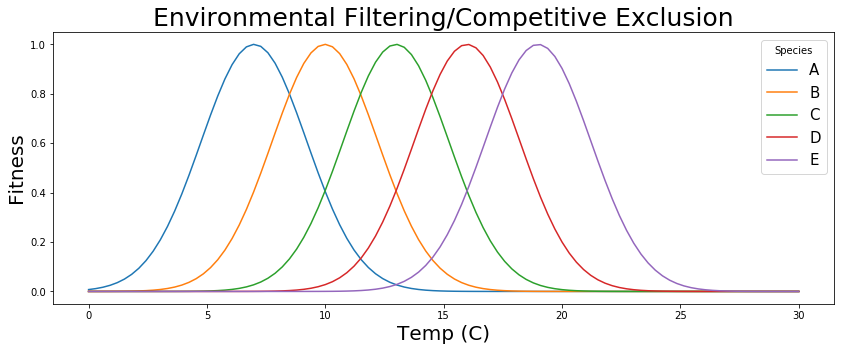

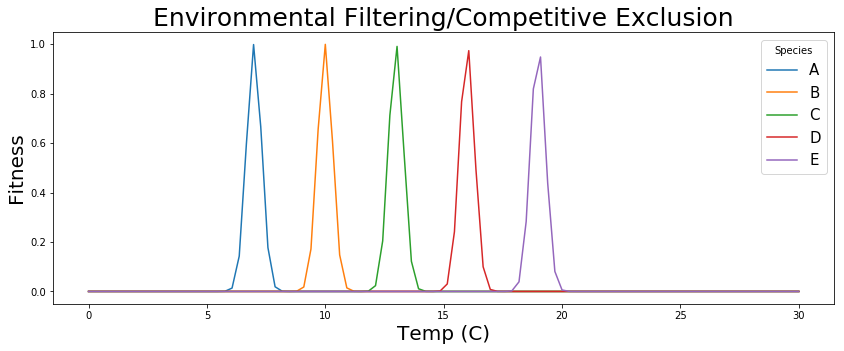

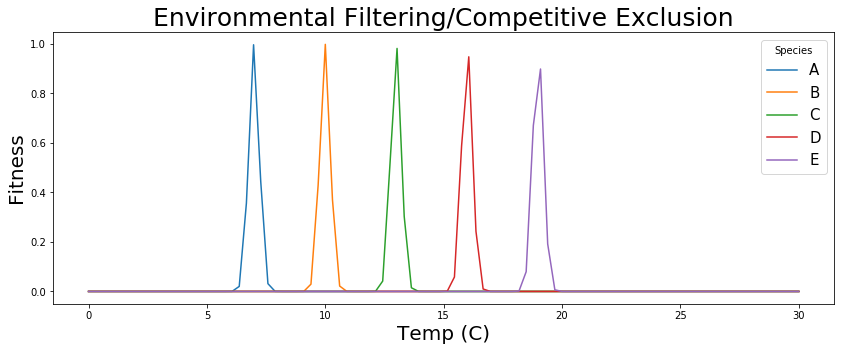

In [5]:
strength = 1.
filt_opt = -6.59174568179
def plot_traits(strength):
    def filt(strength = strength, victim_trait=-3.32923208, filt_opt=filt_opt):
        return 1 - (np.exp(-((victim_trait - filt_opt) ** 2)*strength))
    fig, ax = plt.subplots(figsize=(14, 5))
    xs = np.linspace(0.0001, 30, 100)
    for label, trait in {"A":-2.32923208, "B":-3.32923208, "C":-4.32923208,\
                         "D":-5.32923208, "E":-6.32923208}.items():
        ax.plot(xs, [1 - filt(strength, -3*trait, x) for x in xs], label=label)
    ax.set_ylabel("Fitness", fontsize=20)
    ax.set_xlabel("Temp (C)", fontsize=20)
    ax.set_title("Environmental Filtering/Competitive Exclusion", fontsize=25)
    plt.legend(title="Species", fontsize=15)
    plt.savefig("/tmp/trait_strength.jpg")
for st in [0.001, 0.01, 0.1, 5, 10]:
    plot_traits(st)

# Trait debugging
Something is weird. non-neutral communties are ending up with very very few species at the end. It's bizarre.

In [94]:
%load_ext autoreload
%autoreload 2
import MESS
import collections
r = MESS.Region("watdo")
r.set_param("community_assembly_model", "filtering")
r.set_param("ecological_strength", 0.001)
r.set_param("speciation_prob", 0.005)
r.set_param("generations", 0.05)
r.run(sims=1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
    Generating 1 simulation(s).
  [####################] 100%  Finished 0 simulations    | 0:00:00 | 
 

In [95]:
isl1 = r.islands.values()[0]
isl1.get_stats().T
print(isl1.region.metacommunity._hackersonly["filtering_optimum"])
display(isl1.get_stats().T)
isl1._get_params_values()
sp = list(isl1.local_info.columns)
try:
    sp.remove(None)
except:
    pass
dp = {x:[isl1.region.get_trait(x), isl1._filt_death_probs[x]] for x in sp}
mask = np.array(dp.values())<0.5
dp

-5.522210156268437


,J,m,speciation_prob,generation,_lambda,migrate_calculated,extrate_calculated,trait_rate_local,filtering_optimum,S,abund_h1,abund_h2,abund_h3,abund_h4,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,mean_dxys,std_dxys,skewness_dxys,kurtosis_dxys,median_dxys,iqr_dxys,trees,trait_h1,trait_h2,trait_h3,trait_h4,mean_local_traits,std_local_traits,skewness_local_traits,kurtosis_local_traits,median_local_traits,iqr_local_traits,mean_regional_traits,std_regional_traits,skewness_regional_traits,kurtosis_regional_traits,median_regional_traits,iqr_regional_traits,reg_loc_mean_trait_dif,reg_loc_std_trait_dif,reg_loc_skewness_trait_dif,reg_loc_kurtosis_trait_dif,reg_loc_median_trait_dif,reg_loc_iqr_trait_dif,abundance_dxy_cor,abundance_pi_cor,abundance_trait_cor,dxy_pi_cor,dxy_trait_cor,pi_trait_cor,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4,SGD_5,SGD_6,SGD_7,SGD_8,SGD_9
0,1000.0,0.01,0.005,8.0,0.051,0.00725,0.00475,0.588235,-5.52221,18.0,1.323332,1.089382,1.066477,1.058878,1.0,1.0,1.0,1.0,0.000019,0.00008,3.88057,13.058824,0.0,0.0,0.010156,0.007304,-0.074702,-1.897647,0.011491,0.014079,0.0,21.602195,17.219131,14.952468,13.700858,-4.13698,2.02616,1.165354,0.258904,-4.822447,2.33335,-2.498813,2.46249,0.08522,-1.108014,-2.573676,4.114583,1.638167,0.43633,-1.080134,-1.366918,2.248771,1.781233,0.169009,-0.246117,-0.314037,-0.32482,-0.138999,0.303863,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


{'t19': [-3.5070000246297184, 1.0],
 't34': [-0.1631155550221563, 1.0],
 't38': [-3.380850404615692, 1.0],
 't45': [-5.256296511752424, 1.0],
 't47': [-1.1989280817378594, 1.0],
 't7': [0.8003248578612931, 1.0],
 't75': [-4.382883921060616, 1.0],
 't75:Loc1-3990': [-4.610686757461829, 1.0],
 't84': [-5.86750186676829, 1.0],
 't84:Loc1-1538': [-6.0968344344360625, 1.0],
 't84:Loc1-1883': [-5.983692816967355, 1.0],
 't84:Loc1-2853': [-4.687079121178594, 1.0],
 't84:Loc1-3479': [-6.162122905636426, 1.0],
 't84:Loc1-3549': [-4.957815027820169, 1.0],
 't84:Loc1-3647': [-4.982120427627248, 1.0],
 't84:Loc1-3816': [-5.8497696201587255, 1.0],
 't84:Loc1-3957': [-5.433643349520819, 0.9996079335657752],
 't87': [-2.745623584722221, 1.0]}

In [13]:
for i in range(10):
    isl1.step()
    sp = list(isl1.local_info.columns)
    dp = {isl1.region.get_trait(x):isl1._filt_death_probs[x] for x in sp}
isl1.get_stats().T


,J,m,speciation_prob,generation,_lambda,migrate_calculated,extrate_calculated,trait_rate_local,filtering_optimum,S,abund_h1,abund_h2,abund_h3,abund_h4,pi_h1,pi_h2,pi_h3,pi_h4,mean_pi,std_pi,skewness_pi,kurtosis_pi,median_pi,iqr_pi,mean_dxys,std_dxys,skewness_dxys,kurtosis_dxys,median_dxys,iqr_dxys,trees,trait_h1,trait_h2,trait_h3,trait_h4,mean_local_traits,std_local_traits,skewness_local_traits,kurtosis_local_traits,median_local_traits,iqr_local_traits,mean_regional_traits,std_regional_traits,skewness_regional_traits,kurtosis_regional_traits,median_regional_traits,iqr_regional_traits,reg_loc_mean_trait_dif,reg_loc_std_trait_dif,reg_loc_skewness_trait_dif,reg_loc_kurtosis_trait_dif,reg_loc_median_trait_dif,reg_loc_iqr_trait_dif,abundance_dxy_cor,abundance_pi_cor,abundance_trait_cor,dxy_pi_cor,dxy_trait_cor,pi_trait_cor,SGD_0,SGD_1,SGD_2,SGD_3,SGD_4,SGD_5,SGD_6,SGD_7,SGD_8,SGD_9
0,1000.0,0.01,0.005,17.0,0.095,0.010824,0.007176,0.588235,-2.651488,18.0,1.549158,1.162826,1.120413,1.106353,3.637799,3.337488,3.114048,2.955682,0.000128,0.000268,2.088484,3.299022,0.0,0.0,0.006092,0.003539,0.337491,0.194724,0.007544,0.004167,0.0,11.635975,10.710062,10.157317,9.76661,-0.432705,1.912337,0.336393,-0.834892,-1.163577,3.186052,-0.224874,2.177423,0.362216,-0.808924,-0.962504,3.301542,0.207831,0.265086,0.025824,0.025968,0.201073,0.11549,0.344045,0.422667,-0.138444,0.238037,-0.356829,-0.089355,14.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0


In [727]:
isl1.step()
print(isl1.region.metacommunity._hackersonly["filtering_optimum"])
sp = list(isl1.local_info.columns)

{x:[isl1.region.get_trait(x), isl1._filt_death_probs[x]] for x in sp}

-1.0481988282835735


{'t100': [-2.420331773795494, 1.0],
 't18': [0.9302895364757843, 1.0],
 't18:Loc1-90184': [1.0778685098882534, 1.0],
 't25': [-0.6468220554275081, 1.0],
 't32': [6.1508750985738345, 1.0],
 't44': [-2.713027185739751, 1.0],
 't49': [-1.016798462344968, 1.0],
 't6': [-3.180243618158032, 1.0],
 't60': [-1.1819882463439177, 1.0],
 't62': [-4.670741006299224, 1.0],
 't6:Loc1-90114': [-3.26259661641715, 1.0],
 't73': [1.3790654243258416, 1.0],
 't79': [0.2515926181273486, 1.0],
 't82': [-2.309737791871349, 1.0],
 't82:Loc1-16295': [-2.9184641047782085, 1.0],
 't82:Loc1-16295:Loc1-50543': [-3.91448185964754, 1.0],
 't82:Loc1-16295:Loc1-89105': [-4.112261316448589, 1.0],
 't82:Loc1-52938': [-1.9912838671566018, 1.0],
 't82:Loc1-7002': [-1.5009148721592183, 1.0],
 't82:Loc1-7002:Loc1-68291': [-1.5150347759044671, 1.0],
 't82:Loc1-84764': [-2.4527979003039677, 1.0],
 't82:Loc1-86206': [-2.429294849452957, 1.0],
 't82:Loc1-87521': [-2.037113778462152, 1.0],
 't88': [-5.65281094154842, 1.0],
 't88

In [96]:

#isl1.local_info
collections.Counter(isl1.local_community)

Counter({'t19': 2,
         't34': 1,
         't38': 2,
         't45': 4,
         't47': 1,
         't7': 1,
         't75': 9,
         't75:Loc1-3990': 1,
         't84': 958,
         't84:Loc1-1538': 7,
         't84:Loc1-1883': 2,
         't84:Loc1-2853': 3,
         't84:Loc1-3479': 1,
         't84:Loc1-3549': 1,
         't84:Loc1-3647': 2,
         't84:Loc1-3816': 1,
         't84:Loc1-3957': 1,
         't87': 3})

## Trait hill number debugging

## Worked example from the supplement
From [https://www.annualreviews.org/doi/suppl/10.1146/annurev-ecolsys-120213-091540/suppl_file/es45_chao_supappendix2.pdf](appendix 2), worked example showing that our code gets the same results as the example.

In [297]:
## Appendix 2 example
if True:
    p = 0.1
    q = 0.4
    r = 0.5
    pqr = np.array([p, q, r])
    p, q, r = pqr/np.sum(pqr)
    print(p, q, r)
    abunds = np.array([p*p, p*q, p*r, q*p, q*q, q*r, r*p, r*q, r*r])
    vals = np.array([0, 1.5, 3, 1.5, 0, 2.6, 3, 2.6, 0])
    print(np.sum(abunds*vals))
    print(MESS.stats.generalized_hill_number(abunds, vals, order=1)**(1/2.))


(0.1, 0.4, 0.5)
1.46
2.754642701157805


In [172]:
from sklearn.metrics import pairwise_distances

dat = isl1.get_community_data()
#display(dat)
## Use all species
abunds = dat["abundance"]
traits = dat["trait"]
#abunds = [18] * 18
## Just the last two
abunds = dat["abundance"][:15]
traits = dat["trait"][:15]
## Fuck with abundance
#abunds.iloc[0] = 50
#abunds.iloc[1] = 50
#traits.iloc[1] = 100
#traits = pd.DataFrame(np.arange(0,18).T)
#print([generalized_hill_number(abunds, order=x, scale=False) for x in range(0,2)])
print([MESS.stats.trait_hill_number(abunds, traits, order=x, debug=True) for x in range(0,3)])

sums dij 511.40718017505077 pij 1.0000000000000002
sums dij 511.40718017505077 pij 1.0000000000000002
sums dij 511.40718017505077 pij 1.0000000000000002
[17.775079993615943, 13.398899184793848, 10.099130159368515]


## This shows a good example of how the trait hill #s degenerate w/ 2 species

2
[0.25 0.25 0.25 0.25]
Q 2.11103847
abunds/Q [0.11842513 0.11842513 0.11842513 0.11842513]
[0.         0.05921256 0.05921256 0.        ]
qFD(Q) 8.44415388
qFD(Q)/Q 4.0
[0.555025 0.189975 0.189975 0.065025]
Q 1.60417813335
abunds/Q [0.34598714 0.11842513 0.11842513 0.04053478]
[0.         0.05921256 0.05921256 0.        ]
qFD(Q) 8.44415388
qFD(Q)/Q 5.26385050665
[9.801e-01 9.900e-03 9.900e-03 1.000e-04]
Q 0.083597123412
abunds/Q [1.17240876e+01 1.18425128e-01 1.18425128e-01 1.19621341e-03]
[0.         0.05921256 0.05921256 0.        ]
qFD(Q) 8.44415388
qFD(Q)/Q 101.01010101
[2.0, 2.29430828500566, 10.050378152592117]


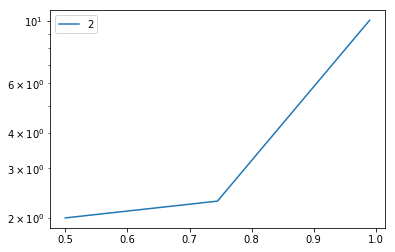

In [321]:

def hill(p=.8, order=0):
    p = p
    q = 1-p
    abunds = np.array([p*p, p*q, p*q, q*q])
    vals = np.array([0., 4.22207694, 4.22207694, 0.])
    abunds = abunds/np.sum(abunds)
    print(abunds)
    V_bar = np.sum(vals * abunds)
    print("Q {}".format(V_bar))
    print("abunds/Q {}".format(abunds/V_bar))
    print(vals*(abunds/V_bar)**order)
    print("qFD(Q) {}".format(np.sum(vals*(abunds/V_bar)**order)**(1./(1-order))))
    print("qFD(Q)/Q {}".format(np.sum(vals*(abunds/V_bar)**order)**(1./(1-order))/V_bar))
    return ((np.sum(vals*(abunds/V_bar)**order)**(1./(1-order)))/V_bar)**(1/2.)
    #return ((np.sum(vals))/V_bar)**(1/2.)

for order in range(1 ,3):
    if order == 1: continue
    print(order)
    ys = np.linspace(0.5, .99, 3)
    xs = [hill(x, order=order) for x in ys]
    print(xs[-10:])
    plt.semilogy(ys, xs, label=order)
    plt.legend()


## For 3 species

(0.3333333333333333, 0.3333333333333333, 0.3333333333333333)
Q 1.57777777778
qFD(Q) 14.2
(0.19047619047619047, 0.6190476190476191, 0.19047619047619047)
Q 1.18458049887
qFD(Q) 11.5105682278
(0.13333333333333333, 0.7333333333333334, 0.13333333333333333)
Q 0.908444444444
qFD(Q) 10.2783310372
(0.10256410256410257, 0.7948717948717949, 0.10256410256410257)
Q 0.731623931624
qFD(Q) 9.7032722349
(0.08333333333333333, 0.8333333333333333, 0.08333333333333333)
Q 0.611111111111
qFD(Q) 9.37530266344
[3.0, 3.4622775745255874, 3.9536205508220665, 4.405550874144219, 4.820411148062335]


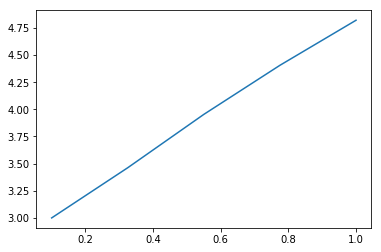

In [331]:
def get_h0(fq=0.5):
    p = 0.1
    q = fq
    r = 0.1
    pqr = np.array([p, q, r])
    p, q, r = pqr/np.sum(pqr)
    print(p, q, r)
    abunds = np.array([p*p, p*q, p*r, q*p, q*q, q*r, r*p, r*q, r*r])
    vals = np.array([0, 1.5, 3, 1.5, 0, 2.6, 3, 2.6, 0])
    Q = np.sum(vals * abunds)
    print("Q {}".format(Q))
    print("qFD(Q) {}".format(np.sum(vals*(abunds/Q)**order)**(1./(1-order))))
    return MESS.stats.generalized_hill_number(abunds, vals, order=0)**(1/2.)

xs = np.linspace(0.1, 1, 5)
ys = [get_h0(x) for x in xs]
print(ys)
plt.plot(xs, ys)

dij [0.00000000e+00 1.07263642e+00 2.02918600e+00 1.88483949e+00
 2.18379247e+00 3.01146469e+00 1.52333010e+00 2.88744264e+00
 1.47102802e+00 3.99680090e+00 1.60396885e+00 1.14027242e+00
 1.28341883e+00 1.04915501e+00 1.91963729e+00 1.22527350e+00
 1.14594497e+00 2.07613197e+00 1.07263642e+00 0.00000000e+00
 3.10182242e+00 2.95747591e+00 3.25642889e+00 1.93882827e+00
 4.50693677e-01 1.81480621e+00 3.98391602e-01 5.06943732e+00
 2.67660527e+00 2.21290884e+00 2.35605525e+00 2.12179143e+00
 2.99227371e+00 2.29790992e+00 2.21858139e+00 1.00349554e+00
 2.02918600e+00 3.10182242e+00 0.00000000e+00 1.44346506e-01
 1.54606471e-01 5.04065069e+00 3.55251610e+00 4.91662863e+00
 3.50021402e+00 1.96761490e+00 4.25217151e-01 8.88913579e-01
 7.45767164e-01 9.80030984e-01 1.09548712e-01 8.03912503e-01
 8.83241025e-01 4.10531796e+00 1.88483949e+00 2.95747591e+00
 1.44346506e-01 0.00000000e+00 2.98952976e-01 4.89630418e+00
 3.40816959e+00 4.77228213e+00 3.35586752e+00 2.11196141e+00
 2.80870645e-01 7.44

0    18.0
Name: S, dtype: float64

[1, 1, 1, 1, 1, 1, 1]
[18.0, 1.5491584869421917, 1.1628258528746216, 1.1204129719445797, 1.1063528599244372, 1.0993863285590104, 1.095227447256301]


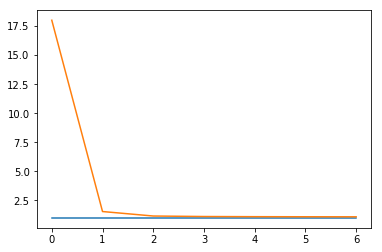

In [223]:
display(isl1.get_stats().T["S"])
xs = list(range(0,7))
dat = isl1.get_community_data()
ys = [trait_hill_number(abunds=dat["abundance"], traits=pd.DataFrame([[0.1]*18]), order=i) for i in xs]
plt.plot(xs, ys)
print(ys)
ys = [generalized_hill_number(abunds=dat["abundance"], order=i, scale=False) for i in xs]
print(ys)
plt.plot(xs, ys)


(5.04415388, 0.9193939393939393, 13.493688076486526)


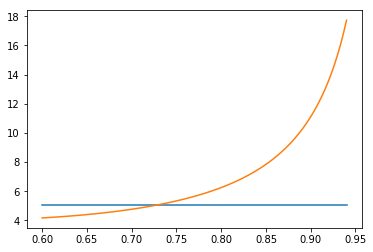

In [295]:
dat = MESS.util.synthetic_community()
abunds = dat["abundance"][:2]
traits = dat["trait"][:2]
abunds[0] = 100000
#[MESS.stats.trait_hill_number(abunds[:2], traits[:2], order=x, debug=True) for x in range(0,4)]

def hill(p=.99, order=0, ret_dij=False):
    p = p
    q = 1-p
    abunds = np.array([p*p, p*q, p*q, q*q])
    ## Random trait distances
    dij = np.array([0., 2.52207694, 2.52207694, 0.])
    abunds = abunds/np.sum(abunds)
    V_bar = np.sum(dij * abunds)
    #print(np.sum(dij), V_bar)
    if ret_dij: return np.sum(dij)
    else: return np.sum(dij)/V_bar

    ## Return any hill number
    #return ((np.sum(dij*(abunds/V_bar)**order)**(1./(1-order)))/V_bar)**(1/2.)
    #return just hill 0
    ##return ((np.sum(vals))/V_bar)**(1/2.)
xs = np.linspace(0.6, .94, 100)
dij_ys = [hill(p=x, ret_dij=True) for x in xs]
plt.plot(xs, dij_ys)
vbar_ys = [hill(p=x, ret_dij=False) for x in xs]
plt.plot(xs, vbar_ys)
print(dij_ys[0], xs[-7], vbar_ys[-7])

In [247]:
(8.538/0.04)**(1/2.)

14.609928131240071

/home/iovercast/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


sums dij 61.01135426252008 pij 1.0
vbar 1.2449232095672536
sums dij 61.01135426252008 pij 1.0
vbar 1.2449232095672536
sums dij 61.01135426252008 pij 1.0
vbar 1.2449232095672536
sums dij 61.01135426252008 pij 1.0
vbar 1.2449232095672536
(5, [7.000580447407082, 5.535404707192273, 5.281494095731037, 5.201346465094652])
sums dij 284.61434684416 pij 1.0
vbar 1.1121694504986692
sums dij 284.61434684416 pij 1.0
vbar 1.1121694504986692
sums dij 284.61434684416 pij 1.0
vbar 1.1121694504986692
sums dij 284.61434684416 pij 1.0
vbar 1.1121694504986692
(10, [15.997160913519124, 8.728893852456954, 6.676572003959871, 6.064547020959145])
sums dij 1197.5223077110586 pij 1.0
vbar 2.4782548497592307
sums dij 1197.5223077110586 pij 1.0
vbar 2.4782548497592307
sums dij 1197.5223077110586 pij 1.0
vbar 2.4782548497592307
sums dij 1197.5223077110586 pij 1.0
vbar 2.4782548497592307
(20, [21.982082009817642, 12.625531745810315, 9.430965707746827, 8.522813111659362])
sums dij 33309.38410141934 pij 1.0
vbar 3.300

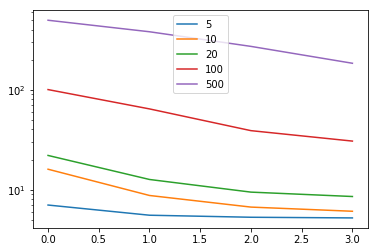

In [229]:
for nspecies in [5, 10, 20, 100, 500]:
    dat = MESS.util.synthetic_community(nspecies=nspecies)
    abunds = dat["abundance"]
    traits = dat["trait"]
    for abnd in [10000]:#[100, 1000, 10000, 100000]:
        abunds[0] = abnd
        hs = [MESS.stats.trait_hill_number(abunds, traits, order=x, debug=True) for x in range(0,4)]
        print(len(dat), hs)
        plt.semilogy(hs, label=nspecies)
    plt.legend()

/home/iovercast/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/iovercast/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


0    1000
1       1
Name: abundance, dtype: int64
sums dij 2.0 pij 1.0
vbar 1.0
sums dij 2.0 pij 1.0
vbar 1.0
sums dij 2.0 pij 1.0
vbar 1.0
sums dij 2.0 pij 1.0
vbar 1.0
[2.0, 1.0079316449071047, 1.0019999980000018, 1.0015003744367732]
0    10000
1        1
Name: abundance, dtype: int64
sums dij 2.0 pij 1.0
vbar 1.0
sums dij 2.0 pij 1.0
vbar 1.0
sums dij 2.0 pij 1.0
vbar 1.0
sums dij 2.0 pij 1.0
vbar 1.0
[2.0, 1.0010214582768588, 1.000199999998, 1.0001500037494375]
0    100000
1         1
Name: abundance, dtype: int64
sums dij 2.0 pij 1.0
vbar 1.0
sums dij 2.0 pij 1.0
vbar 1.0
sums dij 2.0 pij 1.0
vbar 1.0
sums dij 2.0 pij 1.0
vbar 1.0
[2.0, 1.0001251358822103, 1.000019999999998, 1.0000150000374994]


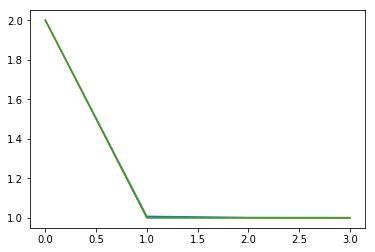

In [250]:
dat = MESS.util.synthetic_community(nspecies=10)
abunds = dat["abundance"]
traits = dat["trait"]

for abnd in [1000, 10000, 100000]:
    abunds[0] = abnd
    abunds[1] = 1
    abunds = abunds[:2]
    print(abunds)
    hs = [MESS.stats.generalized_hill_number(abunds/np.sum(abunds), order=x, debug=True) for x in range(0,4)]
    print(hs)
    plt.plot(hs)

In [214]:
dat = MESS.util.synthetic_community(nspecies=3)
abunds = dat["abundance"]
traits = dat["trait"]
print(abunds)
pij = np.outer(abunds, abunds).flatten()
print(pij)
pij = pij/np.sum(abunds)**2.
pij

0    184
1    396
2    527
Name: abundance, dtype: int64
[ 33856  72864  96968  72864 156816 208692  96968 208692 277729]


array([0.02762742, 0.05945902, 0.07912855, 0.05945902, 0.12796616,
       0.1702984 , 0.07912855, 0.1702984 , 0.22663448])

In [336]:
np.exp(2.5)

12.182493960703473